# Perceptron


### Build Model 
Implement **Simple Feedback Learning** for emotion classification (dataset from: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp)

Use the correct/incorrect feedback and info about (y>d) or (y<d) to change weights.  


- 1. Implement forward and calculate the output
- 2. Update the weights and bias
- 3. Predict function
- 4. Activation function

### Evaluator Function
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate the Model
Train the model with customized learning rate and number of iterations  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [3]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

## Data Preprocessing

In [5]:
# encode label
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# We transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [7]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision, recall and f1
    # DO NOT use any python packages such as scikit-learn
    tp = tn = fp = fn = 0
    
    #TP: test = 1; predicted 1
    #TN: test = 0; predicted 0
    #FP: test = 0; predicted 1
    #FN: test = 1; predicted 0

    #iterate through arrays 

    for i in range(y_test.shape[0]):
        for yt, yp in zip(y_test, y_pred):
            if (yt == 1) & (yp == 1):
                tp += 1
            if (yt == 0) & (yp == 0):
                tn += 1
            if (yt == 0) & (yp == 1):
                fp += 1
            if (yt == 1) & (yp == 0):
                fn += 1
        
    #print results
    #print(tp, tn, fp, fn)
    print(" EVALUATION METRICS\n")
    #PRINT CONFUSION MATRIX
    print("  Confusion Matrix")

    print("     TP     FP")
    print("     FN     TN\n")
   
    matrix = np.array([[tp, fp], [fn, tn]])
    print(matrix)
    print()
     #ACCURACY
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    print("   Accuracy: %.2f" % accuracy)
    #PRECISION
    precision = tp/(tp+fp)
    print("   Precision: %.2f" % precision)
    #RECALL 
    recall = tp/(tp+fn)
    print("   Recall: %.2f" % recall)
    #F1
    f1 = (2*precision*recall)/(precision+recall)
    print("   F1 score: %.2f" % f1)
    ####################################################################################################

In [8]:
from tkinter import W


class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
        f = np.dot(x, self.W) + self.b
        fx = np.where(f > 0.5, 1, 0)
        return fx
        ####################################################################################################
        
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10,verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)
        

        for i in range(n_iters):
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                prediction = self.predict(xi)
                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to adjust the weights and bias

                #SIMPLE FEEDBACK LEARNING
                # y = 1 and d = 0 (y>d)
                if (prediction > yi):
                    self.W -= (learning_rate * xi)
                # y = 0 and d = 1 (y<d)
                elif (prediction < yi):
                    self.W += (learning_rate * xi)

                self.b += learning_rate * (yi - prediction)

                #ERROR CALCULATION LEARNING
                #self.W += (learning_rate * (yi - prediction) * xi)
                #self.b += learning_rate * (yi - prediction)
                ####################################################################################################

            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        y_pred = self.f(x)
        ####################################################################################################
        return y_pred

In [9]:
####################################################################################################
# enter code here to initialize and train the model
model1 = SimpleFeedbackLearning() #initializing new perceptron
model1.train(x_train, y_train, x_test, y_test)
####################################################################################################


epoch 1, train acc 0.8380, test acc 0.8225
epoch 2, train acc 0.9132, test acc 0.9025
epoch 3, train acc 0.9614, test acc 0.9405
epoch 4, train acc 0.9326, test acc 0.9180
epoch 5, train acc 0.9566, test acc 0.9210
epoch 6, train acc 0.9539, test acc 0.9375
epoch 7, train acc 0.9693, test acc 0.9330
epoch 8, train acc 0.9738, test acc 0.9355
epoch 9, train acc 0.9576, test acc 0.9300
epoch 10, train acc 0.9702, test acc 0.9285


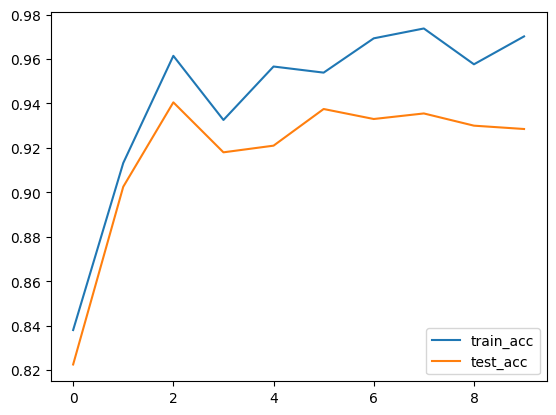

In [10]:
# plot the accuracy
plt.plot(model1.history['train_acc'], label='train_acc')
plt.plot(model1.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [11]:
####################################################################################################
# enter code here to evaluate the model with the evaluator function
evaluator(y_test, model1.predict(x_test))
####################################################################################################

 EVALUATION METRICS

  Confusion Matrix
     TP     FP
     FN     TN

[[1788000  234000]
 [  52000 1926000]]

   Accuracy: 0.93
   Precision: 0.88
   Recall: 0.97
   F1 score: 0.93
